In [1]:
!pip3 install pandas --trusted-host mirrors.aliyun.com

     ---------------------------------------- 0.0/341.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/341.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/341.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/341.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/341.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/341.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/341.8 kB ? eta -:--:--
     - -------------------------------------- 10.2/341.8 kB ? eta -:--:--
     --- --------------------------------- 30.7/341.8 kB 660.6 kB/s eta 0:00:01
     --- --------------------------------- 30.7/341.8 kB 660.6 kB/s eta 0:00:01
     ---- -------------------------------- 41.0/341.8 kB 196.9 kB/s eta 0:00:02
     ------ ------------------------------ 61.4/341.8 kB 297.7 kB/s eta 0:00:01
     ------- ----------------------------- 71.7/341.8 kB 261.4 kB/s eta 0:00:02
     ------- --

In [2]:
import numpy as np
import pandas as pd
import torch
import torch.optim as optim
import matplotlib.pyplot as plt

%matplotlib inline

0      16
1      40
2      32
3      13
4       1
5       1
6       2
7       3
8       8
9      14
10     36
11     56
12     84
13     94
14    106
15    110
16     93
17     67
18     35
19     37
20     36
21     34
22     28
23     39
24     17
25     17
26      9
27      6
28      3
29      2
30      1
31      8
32     20
33     53
34     70
35     93
36     75
37     59
38     74
39     76
40     65
41     53
42     30
43     22
44     31
45      9
46      8
47      5
48      2
49      1
Name: cnt, dtype: int64


Text(0, 0.5, 'Y')

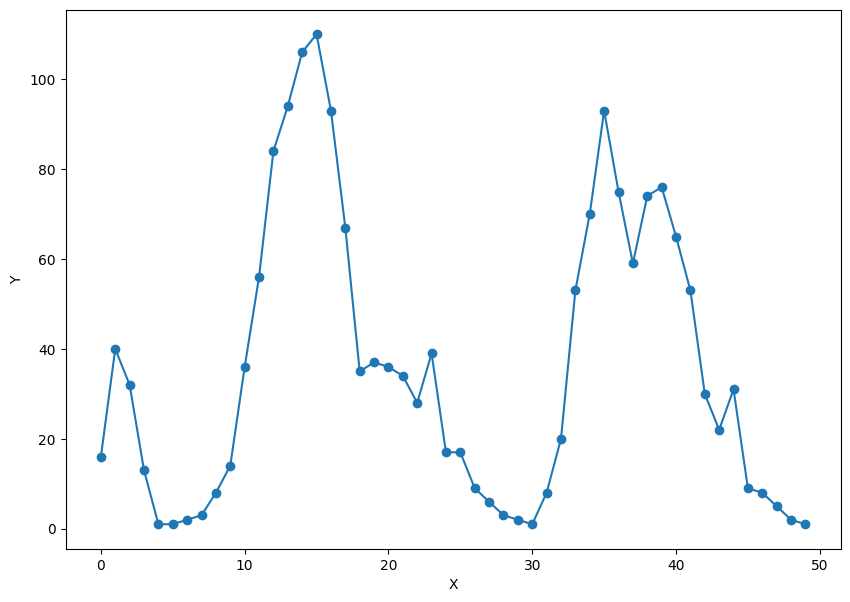

In [34]:
# 读取样本数据
data_path = 'dataset/hour.csv'
rides = pd.read_csv(data_path)
rides.head()

counts = rides['cnt'][:50]
print(counts)

x = np.arange(len(counts))
y = np.array(counts)

plt.figure(figsize = (10,7))
plt.plot(x,y, 'o-')
plt.xlabel('X')
plt.ylabel('Y')


In [61]:
x = torch.Tensor(np.arange(len(counts), dtype = float))
y = torch.Tensor(np.array(counts, dtype = float))

# 隐含神经元的数量
sz = 10

# 初始化层到隐含层的权重矩阵
weights = torch.randn((1,sz), dtype = torch.double,  requires_grad = True)

# 初始化曾到隐含层的偏置
biases = torch.randn((sz), dtype = torch.double, requires_grad = True)

# 隐含层到输出层的权重矩阵
weights2 = torch.randn((sz,1), dtype = torch.double, requires_grad = True)

# 开始训练
learning_rate = 0.001
losses = []

x = x.view(50,-1)
y = y.view(50,-1)

for i in range(100000):
    # 从输入层到隐含层的计算
    hidden = x * weights + biases
    hidden = torch.sigmoid(hidden)

    # 从隐含层到输出层的计算
    predictions = hidden.mm(weights2)

    loss = torch.mean((predictions - y) ** 2)
    losses.append(loss.data.numpy())

    if i % 10000 == 0:
        print(i)
        print('loss:', loss)

    loss.backward()

    weights.data.add_(- learning_rate * weights.grad.data)
    biases.data.add_(- learning_rate * biases.grad.data)
    weights2.data.add_(- learning_rate * weights2.grad.data)

    #clear
    weights.grad.data.zero_()
    biases.grad.data.zero_()
    weights2.grad.data.zero_()

print('OK')

0
loss: tensor(2487.7890, dtype=torch.float64, grad_fn=<MeanBackward0>)
10000
loss: tensor(864.7042, dtype=torch.float64, grad_fn=<MeanBackward0>)
20000
loss: tensor(780.3626, dtype=torch.float64, grad_fn=<MeanBackward0>)
30000
loss: tensor(555.0737, dtype=torch.float64, grad_fn=<MeanBackward0>)
40000
loss: tensor(510.5847, dtype=torch.float64, grad_fn=<MeanBackward0>)
50000
loss: tensor(473.0971, dtype=torch.float64, grad_fn=<MeanBackward0>)
60000
loss: tensor(466.9407, dtype=torch.float64, grad_fn=<MeanBackward0>)
70000
loss: tensor(465.6700, dtype=torch.float64, grad_fn=<MeanBackward0>)
80000
loss: tensor(464.8816, dtype=torch.float64, grad_fn=<MeanBackward0>)
90000
loss: tensor(464.2521, dtype=torch.float64, grad_fn=<MeanBackward0>)
OK


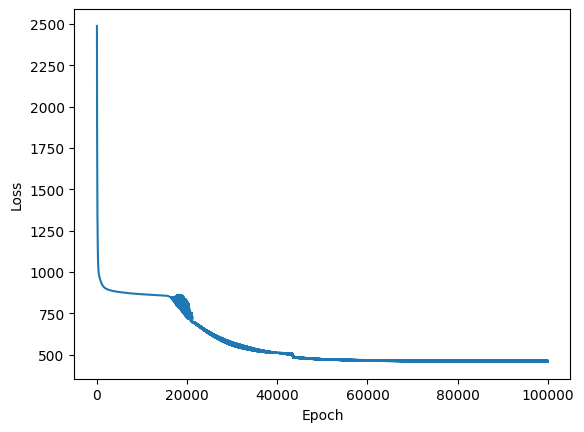

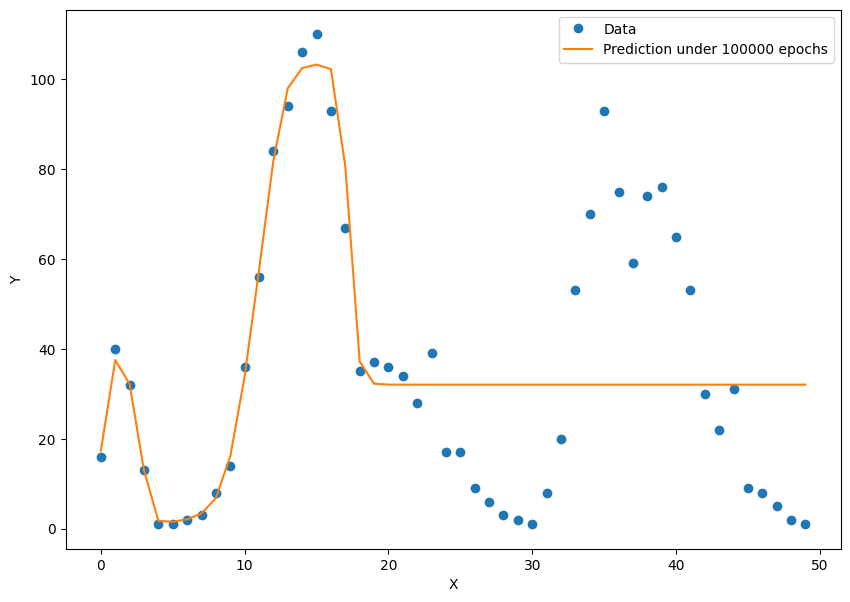

In [64]:
# 打印loss
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')

x_data = x.data.numpy()
plt.figure(figsize = (10,7))
xplot, = plt.plot(x_data, y.data.numpy(), 'o')
yplot, = plt.plot(x_data, predictions.data.numpy())
plt.xlabel('X')
plt.ylabel('Y')
plt.legend([xplot, yplot], ['Data', 'Prediction under 100000 epochs'])
plt.show()

In [70]:
# 训练数据归一化
x = torch.Tensor(np.arange(len(counts), dtype = float) / len(counts))
y = torch.Tensor(np.array(counts, dtype = float))

# 隐含神经元的数量
sz = 10

# 初始化层到隐含层的权重矩阵
weights = torch.randn((1,sz), dtype = torch.double,  requires_grad = True)

# 初始化曾到隐含层的偏置
biases = torch.randn((sz), dtype = torch.double, requires_grad = True)

# 隐含层到输出层的权重矩阵
weights2 = torch.randn((sz,1), dtype = torch.double, requires_grad = True)

# 开始训练
learning_rate = 0.001
losses = []

x = x.view(50,-1)
y = y.view(50,-1)

for i in range(100000):
    # 从输入层到隐含层的计算
    hidden = x * weights + biases
    hidden = torch.sigmoid(hidden)

    # 从隐含层到输出层的计算
    predictions = hidden.mm(weights2)

    loss = torch.mean((predictions - y) ** 2)
    losses.append(loss.data.numpy())

    if i % 10000 == 0:
        print(i)
        print('loss:', loss)

    loss.backward()

    weights.data.add_(- learning_rate * weights.grad.data)
    biases.data.add_(- learning_rate * biases.grad.data)
    weights2.data.add_(- learning_rate * weights2.grad.data)

    #clear
    weights.grad.data.zero_()
    biases.grad.data.zero_()
    weights2.grad.data.zero_()

print('OK')

0
loss: tensor(2149.7879, dtype=torch.float64, grad_fn=<MeanBackward0>)
10000
loss: tensor(934.0810, dtype=torch.float64, grad_fn=<MeanBackward0>)
20000
loss: tensor(664.5679, dtype=torch.float64, grad_fn=<MeanBackward0>)
30000
loss: tensor(545.2500, dtype=torch.float64, grad_fn=<MeanBackward0>)
40000
loss: tensor(500.1433, dtype=torch.float64, grad_fn=<MeanBackward0>)
50000
loss: tensor(467.8461, dtype=torch.float64, grad_fn=<MeanBackward0>)
60000
loss: tensor(410.1089, dtype=torch.float64, grad_fn=<MeanBackward0>)
70000
loss: tensor(178.9881, dtype=torch.float64, grad_fn=<MeanBackward0>)
80000
loss: tensor(106.9473, dtype=torch.float64, grad_fn=<MeanBackward0>)
90000
loss: tensor(73.3310, dtype=torch.float64, grad_fn=<MeanBackward0>)
OK


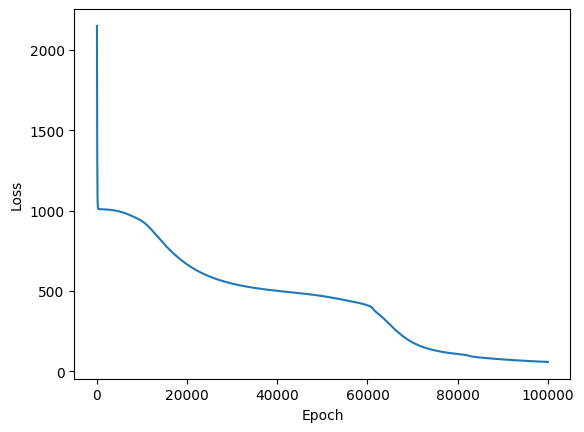

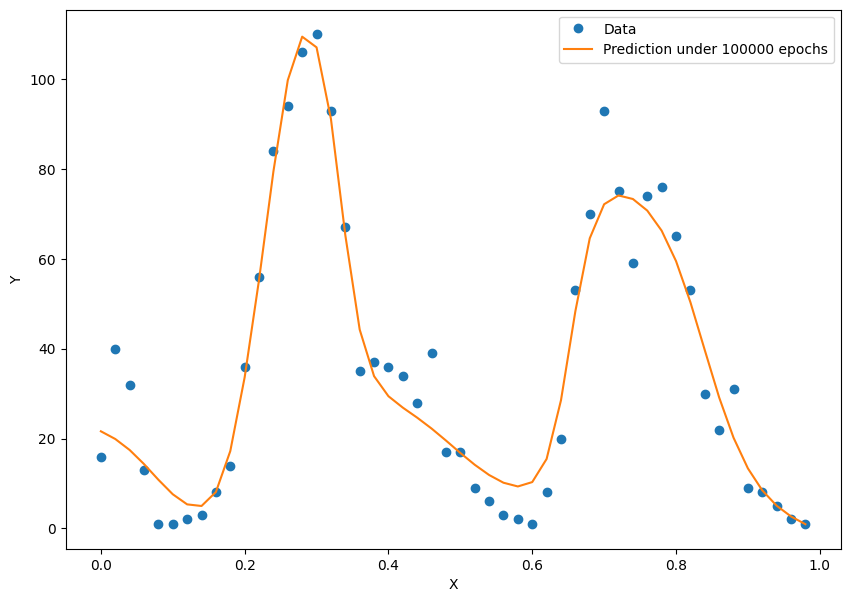

In [71]:
# 打印loss
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')

x_data = x.data.numpy()
plt.figure(figsize = (10,7))
xplot, = plt.plot(x_data, y.data.numpy(), 'o')
yplot, = plt.plot(x_data, predictions.data.numpy())
plt.xlabel('X')
plt.ylabel('Y')
plt.legend([xplot, yplot], ['Data', 'Prediction under 100000 epochs'])
plt.show()

tensor(9385.6254, dtype=torch.float64, grad_fn=<MeanBackward0>)


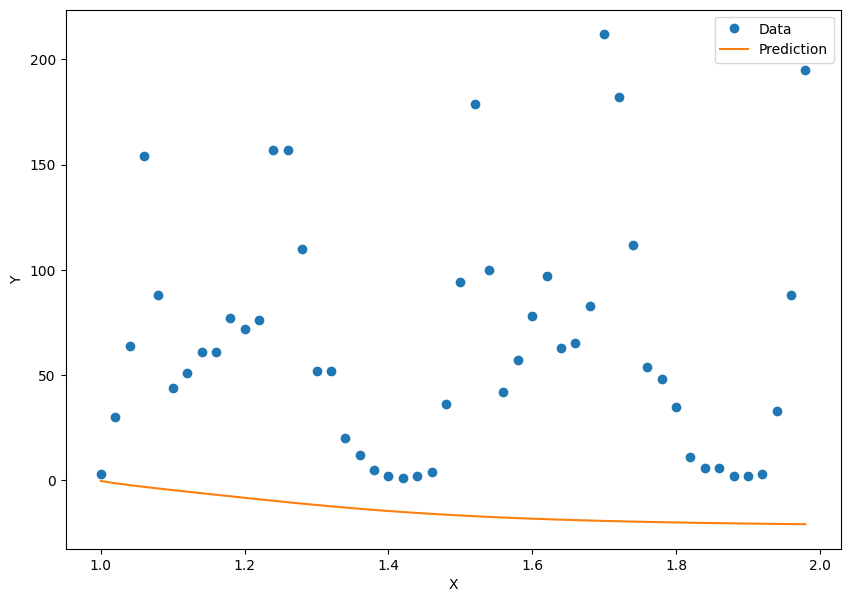

In [78]:
counts_predict = rides['cnt'][50:100] #读取待预测的接下来的50个数据点

#首先对接下来的50个数据点进行选取，注意x应该取51，52，……，100，然后再归一化
x = torch.tensor((np.arange(50, 100, dtype = float) / len(counts))
                 , requires_grad = True)
#读取下50个点的y数值，不需要做归一化
y = torch.tensor(np.array(counts_predict, dtype = float), requires_grad = True)

x = x.view(50, -1)
y = y.view(50, -1)

# 从输入层到隐含层的计算
hidden = x * weights + biases

# 将sigmoid函数作用在隐含层的每一个神经元上
hidden = torch.sigmoid(hidden)

# 隐含层输出到输出层，计算得到最终预测
predictions = hidden.mm(weights2)

# 计算预测数据上的损失函数
loss = torch.mean((predictions - y) ** 2) 
print(loss)


x_data = x.data.numpy() # 获得x包裹的数据
plt.figure(figsize = (10, 7)) #设定绘图窗口大小
xplot, = plt.plot(x_data, y.data.numpy(), 'o') # 绘制原始数据
yplot, = plt.plot(x_data, predictions.data.numpy())  #绘制拟合数据
plt.xlabel('X') #更改坐标轴标注
plt.ylabel('Y') #更改坐标轴标注
plt.legend([xplot, yplot],['Data', 'Prediction']) #绘制图例
plt.show()